# Lecture 7: Unsupervised Learning Methods
Up until this lecture, we have studied mostly __supervised learning__ algorithms. That is, learners that require that the training data have specified __dependent variable__ for which data points that have been already been classified. This means that the supervised learner has an "answer key" to the training set. Unsupervised Learning methods, however, are designed for datasets and objectives where no such answer key exists. Rather, they focus on potential __latent variables__, ones that are not necessarily apparent in the data, but can neveretheless be crucial in understanding the nature of the dataset and its behaviors.
## Latent Variables
When we say __latent variables__, we refer to variables that are not necessarily part of the data. For example, if we have a dataset with information on movie length, director, cast, and rated stars, we may not necessarily know the "genres" in the movie dataset. If our task was to identify the genres present in the data without using any other sources of information, we would have to somehow create groups and assign data points to each group. Our latent variable, then, is the __number of genre groups__, and their respective locations within the dataset.

Any sort of model assumed on a dataset, if it carries input parameters that does not exist within the data, can potentially be a unsupervised learning problem. In this lecture, we will explore a few of these problems. 

In [5]:
sample_user_names <- c("Arthur","Bob","Charlie","David")
movie1_ratings <- c(3,1,2,5)
movie2_ratings <- c(4,3,3,4)
movie3_ratings <- c(5,5,5,2)
movie4_ratings <- c(2,2,2,1)
movie5_ratings <- c(3,4,NA,1)
sample_dataset <- data.frame(sample_user_names, movie1_ratings, movie2_ratings, movie3_ratings, movie4_ratings, movie5_ratings)
sample_dataset

sample_user_names,movie1_ratings,movie2_ratings,movie3_ratings,movie4_ratings,movie5_ratings
Arthur,3,4,5,2,3
Bob,1,3,5,2,4
Charlie,2,3,5,2,NA
David,5,4,2,1,1


Let us suppose that our objective here is to determine whether or not to recommend movie5 to Charlie. The NA here signifies that he has not yet watched the movie, and thus have not rated it. How could we go about this problem? 

__(Important side Note: notice how this problem is very much like a NA imputation problem, and has similar applications)__

### Collaborative Filtering
Collaborative filtering uses other users' information to recommend the next content. So in this problem, we will first look for someone whose ratings are similar to Charlie - Bob, for example - to decide whether to recommend or not.

We see that Bob gave it a 4, and can use that information to predict that Charlie will think favorably of the movie as well, and recommend movie 5.

### Content Filtering
Content filtering, on the other hand, does not use other users' information, but rather on past information on the certain user. For example, it examines whether movie5 is similar to any other movies that Charlie has seen. We can see that Charlie liked movie 3, and did not like movie 1 and 4. We can compare these movies to movie 5.

This requires another dataset on movies. This dataset could potentially carry information on cast, genre, director, year it was made and etc.

## Proximity/Similarity
As we can see, both methods of filtering uses the idea of __proximity__ or __similarity__: how close a certain object is to certain data points within a bigger dataset. The most common measure used is __Euclidean Distance__, which is represented by formula:
![image](http://mines.humanoriented.com/classes/2010/fall/csci568/portfolio_exports/sphilip/images/euclid_eqn.gif)

In other words, distance between two points is represented by the square root of the sums of squared differences in each dimension. The smaller this metric, the closer the two points. In we can obtain the matrix of these distances using the dist() function. Let's use it on the table above for just the first 4 movies.

In [6]:
distance_matrix_movie <- dist(sample_dataset[,2:5])
distance_matrix_movie <- as.matrix(distance_matrix_movie)
colnames(distance_matrix_movie) <- c("Arthur","Bob",'Charlie',"David")
rownames(distance_matrix_movie) <- c("Arthur","Bob",'Charlie',"David")
distance_matrix_movie

,Arthur,Bob,Charlie,David
Arthur,0.000000,2.236068,1.414214,3.741657
Bob,2.236068,0.000000,1.000000,5.196152
Charlie,1.414214,1.000000,0.000000,4.472136
David,3.741657,5.196152,4.472136,0.000000


This concept forms the fundamental to the idea that similar things are close together and __cluster__ together.
## Cluster Analysis
Clusters are a uesful way to analyze data because it helps yield important insights about the data that is not apparent. If clustering behavior exists, we can use cluster analysis to:
1. Gain important insights about the population from which the data was sampled
2. Produce more accurate and effective input parameters for supervised learning algorithms
3. Challenge predefined notions and assumptions
in this lecture, we will cover two types of clustering, hierarchical clustering and K-means clustering. 

## Hierarchical Clustering
![image](http://www.statisticshowto.com/wp-content/uploads/2016/11/clustergram.png)
Each circle here represents a level in the hierarchy of clusters. This is the essence of hierarchical clustering, grouping closer ones first until we reach one single cluster of all the data points.The diagram to the right is a __dendrogram__. 

### Dendrograms
Dendrograms are visualizations of hierarchical clustering, each length(or "height") of line representing the distance between two clustering objects. The dendrogram is useful in assessing the number of clusters, since any region where all vertical lines have significant lenghts can represent a valid number of clusters in the data.

In the following demo, we will show how to use hierarchical clustering and dendrograms on the Iris dataset in R. 

We will make the dataset fit for an unsuprevised learning problem by removing the Species column and create clusters.

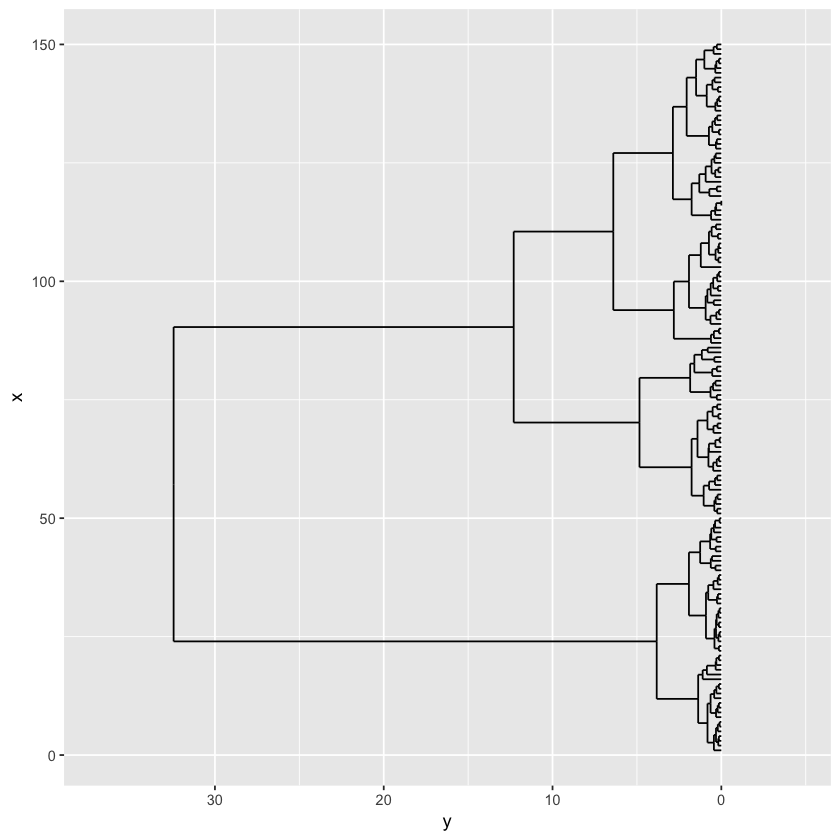

In [7]:
# suppressMessages removes library loading messages in the output
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
suppressMessages(library(ggdendro))

iris_modified <- select(iris, -Species)
hc_iris <- hclust(dist(iris_modified),"ward.D2")
hc_iris <- as.dendrogram(hc_iris)
# Rectangular lines
ddata <- dendro_data(hc_iris, type = "rectangle")
plot_iris <- ggplot(segment(ddata)) + 
  geom_segment(aes(x = x, y = y, xend = xend, yend = yend)) + 
  coord_flip() + 
  scale_y_reverse(expand = c(0.2, 0))
plot_iris

As we can see from this dendrogram, 2~3 clusters seem to be a good parameter for the number of clusters, which matches well with the actual data of 3 species. Note that the shape of the dendrogram can vary depending on the method (we used ward.D2) used for clustering in the hclust function! 

## K-means Clustering
K-means algorithm is a popular clustering algorithm since it is relatively simple and fast, as opposed to other clustering algorithms. The algorithm is defined as the following:

1. Input parameter: k (number of clusters)  
2. Step 1: Pick K random data points, use as centroids  
3. Step 2: Compute distances for all data points to each k centroids, and assign each data point to a cluster containing the closest centroid  
4. Step 3: Once all data points have been classified, compute the midpoint of all points for each cluster and assign as new centroid 
5. Step 4: Repeat steps 2 and 3 until the centroids converge upon certain k points.

Since we only need to calculate k x n distances (rather than n(n-1) distances for knn algorithm), this algorithm is quite scalable and thus be done with relatively less computational resource. 

Let's use k-means clustering, with k=3 on the iris dataset, specifically for petal width and petal length features

In [8]:
x <- kmeans(iris[,3:4], centers = 3, iter.max= 20, nstart=1000000)
iris_data <- cbind(iris[,3:4], x$cluster)

Here, the iter.max defines when to stop if convergence does not occur quickly. The nstart feature represents the number of random sets of k points that the kmeans algorithm chooses to run in parallel. The higher the nstart feature, the more accurate the model becomes, but also more computationally expensive.

Let's see how the cluster compares to actual data

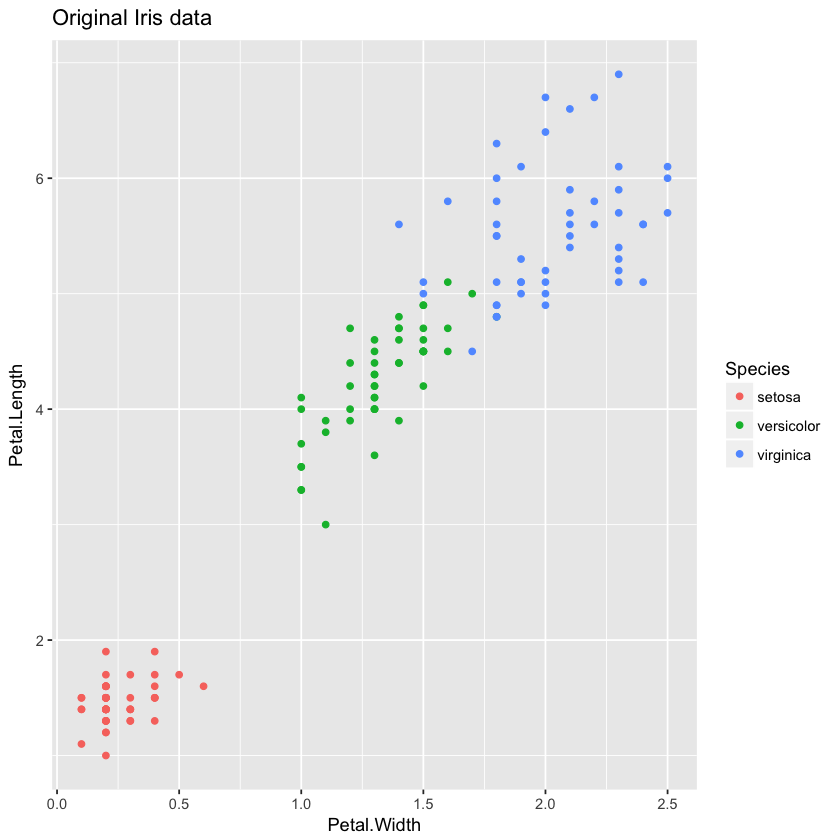

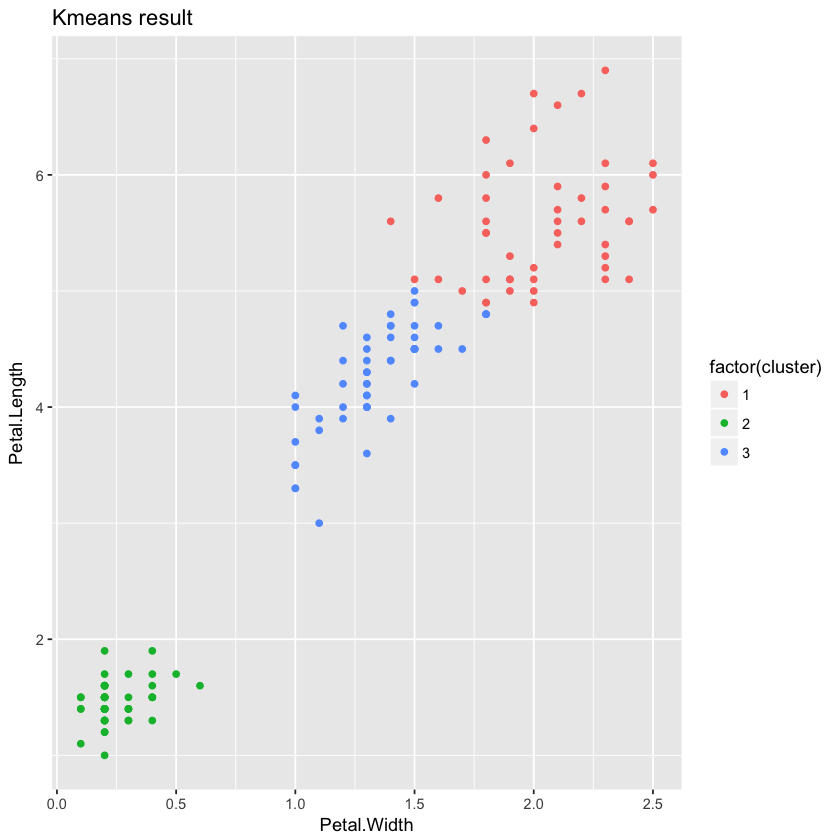

In [9]:
names(iris_data)[3] <- "cluster"
ggplot(iris, aes(x=Petal.Width, y= Petal.Length, color= Species))+ geom_point() + ggtitle("Original Iris data")
ggplot(iris_data, aes(x=Petal.Width, y=Petal.Length, color=factor(cluster))) +geom_point()+ggtitle("Kmeans result")

It seems that the model is performing quite well with the large number of random sets run in parallel.
K-means clustering can be a powerful, scalable tool. One downside is that the k parameter must be first explored if there are no preconceived notions.

## Mixture Models 
Up until now, we dealt with clusters that do not mix. That means clusters have physical boundaries and any points identified within this region is classified into that cluster. On the other hand, mixture models assume a collection of distributions that are not mutually exclusive. They may overlap in regions, and data points are classified by which distribution gives them the highest __conditional probability__. The image below serves as a good example 
![image](https://de.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/54568/versions/1/screenshot.png)

Mixture models generally require that the entire feature space be populated with the a mixture of one kind of distribution. (All Gaussian, all Gamma etc) For this class we will use Gaussian Mixture Models, since they are the most commonly used. Mixture Models generally require specifying the number of distributions(k), although there exists Infinite Mixture Models that use Dirichlet Processes to derive this specific number. For finite mixture models, the __expectation-maximization(EM)__ algorithm is used to derive the specific parameters of k distributions.

### Expectation - Maximization Algorithm
The expectation-maximization algorithm is relatively simple, although the statistics behind is not. The algorithm goes like this
1. Randomly select the parameters for k-distributions
2. Assign clusters to data points by the highest conditional probabilities
3. Use derived properties from the clustered points (for normal, this is mean and variance) as new parameters
4. Repeat until convergence

Next, we will fit a Gaussian Mixture Model that uses(under the hood) the EM algorithm using the __mclust__ package. We will be using the iris data(as always)


In [10]:
library(mclust)

fit <- Mclust(iris[,3:4])
summary(fit)

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust VVE (ellipsoidal, equal orientation) model with 3 components:

 log.likelihood   n df      BIC       ICL
      -136.0377 150 15 -347.235 -357.4307

Clustering table:
 1  2  3 
50 50 50 

By default, the Mclust function fits mixture models for k=1 to 10, and selects the most likely one using log likelihood, selecting the lowest one as best fit. It produces three clusters, the same as the actual number of species. Let's check visually how accurate the classifications were.

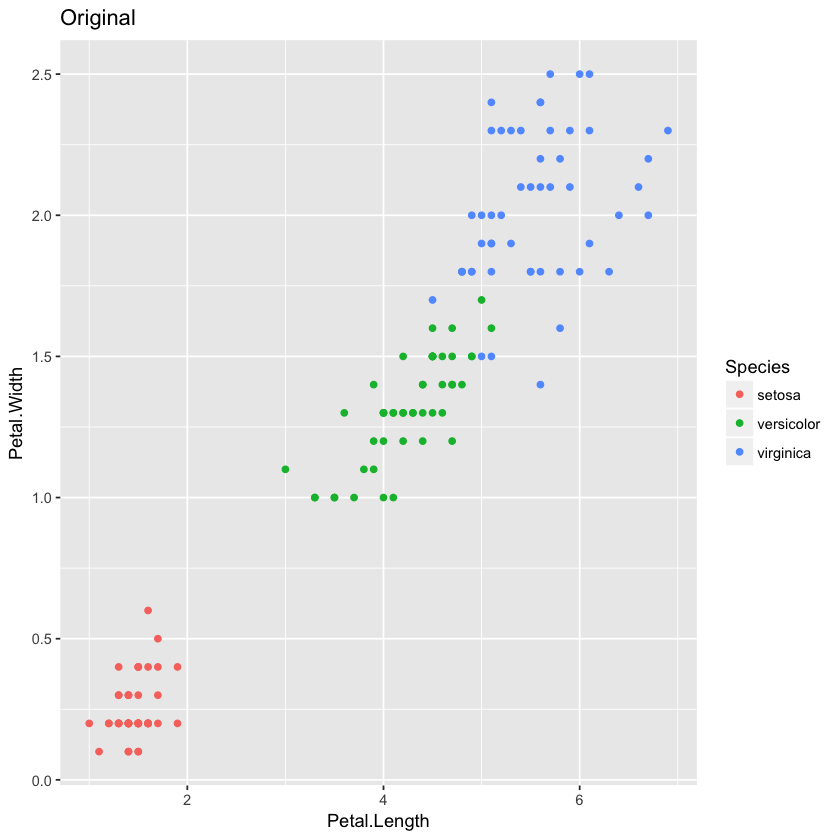

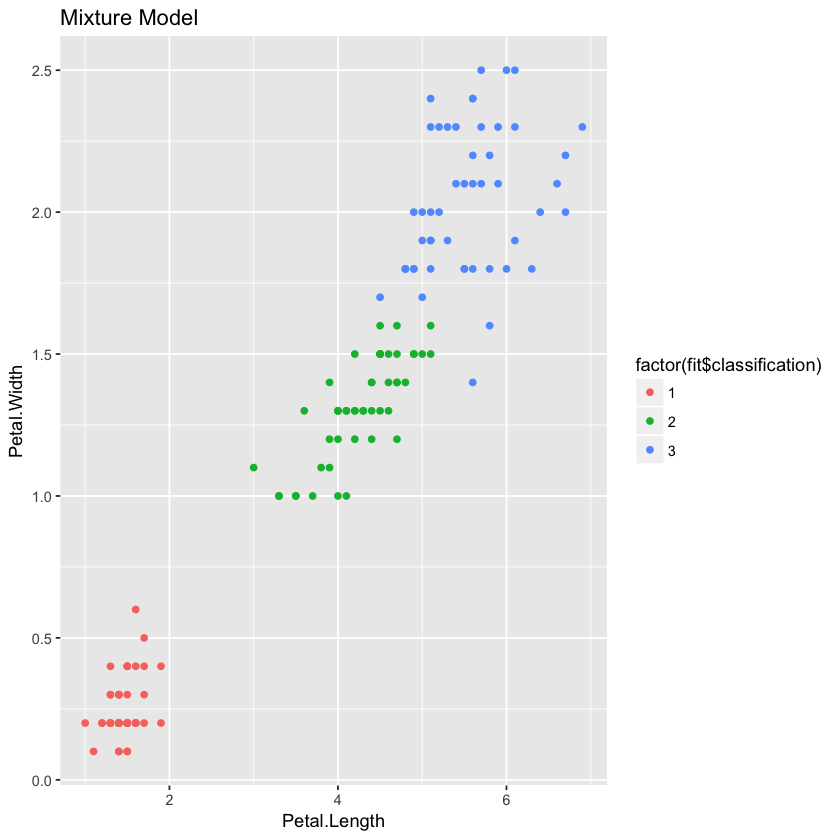

In [11]:
ggplot(iris, aes(x= Petal.Length, y =Petal.Width, color =Species)) + geom_point() +ggtitle("Original")
ggplot(iris, aes(x=Petal.Length, y =Petal.Width, color=factor(fit$classification) )) + geom_point() + ggtitle("Mixture Model")

We can see that except one data point, the classification is almost identical! Mixture models generally incredibly useful since in reality clear-cut subpopulations or clusters do not exist, and often there are a mixture of different forces and groups out there. 

## Principal Component Analysis: Discovering Latent Variables

Suppose you're given a data set with many variables and are asked to find the general "trends" in the data set. You might want a compressed approximation of the data set with fewer variables, or you may want to discover latent variables you hadn't considered. What might you do?

It turns out that there's an elegant way to extract trends from a large and complicated dataset called __principal component analysis__ (PCA). PCA is used in industry quite frequently - an example of this is the million-dollar Netflix prize, in which the key insight of the winning team was to decompose the data set into a compact approximation for further manipulation.

Here is the method:

* Find the direction (i.e. linear combination, or weighted sum, of variables) along which the data has the most variance. This is the direction along which the projections of the data points are the largest. This is called the __first principal component__.
* Find the direction that's orthogonal to the first principal component and has the largest variance (projections of the data points are the largest). This is called the __second principal component__.
* Again, find the direction of largest variance that's orthogonal to the first two principal components.
* Continue the process until you have $k$ principal components.

(picture of PCA)

As a general rule, $n$ dimensional data can have up to $n$ principal components. We often call the set of $k$ principal components where $k < n$ a __low-rank approximation__ to the larger dataset. These are useful for understanding and operating on large or sparse datasets.

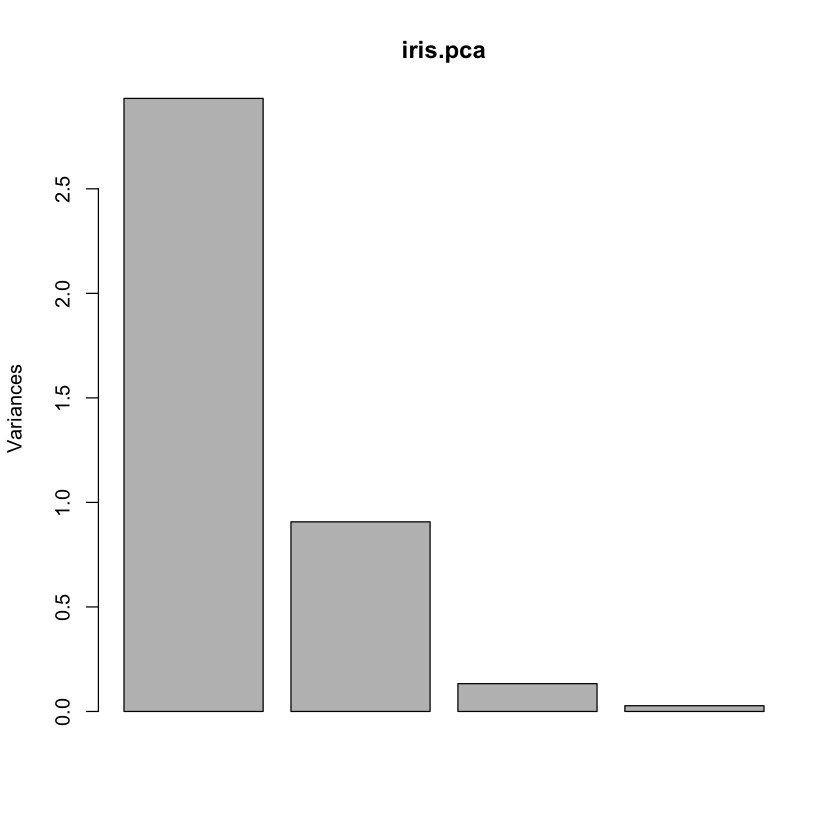

In [1]:
# PCA demo in R
iris <- datasets::iris

# log transformation
log.iris <- log(iris[, 1:4])

# pca
iris.pca <- prcomp(log.iris, center = TRUE, scale. = TRUE)

# plotting PCA result
screeplot(iris.pca)


## Terms to Review

* Latent variable
* Recommendation system
* Collaborative filtering
* Content filtering
* Hierarchical clustering
* Dendrogram
* K-means clustering
* Mixture model
* Expectation maximization algorithm